In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
index_list = glob.glob('./crawling_data/x_data/index/*.csv')
exchage_list = glob.glob('./crawling_data/x_data/exchange/*.csv')
fuel_list = glob.glob('./crawling_data/x_data/fuel/*.csv')

In [4]:
index_dutch = pd.read_csv(index_list[0],index_col=0)
index_euro = pd.read_csv(index_list[1],index_col=0)
index_london = pd.read_csv(index_list[2],index_col=0)
index_nasdaq = pd.read_csv(index_list[3],index_col=0)
index_paris = pd.read_csv(index_list[4],index_col=0)
index_shanghai = pd.read_csv(index_list[5],index_col=0)

In [5]:
exchange_cny = pd.read_csv(exchage_list[0],index_col=0)
exchange_eur = pd.read_csv(exchage_list[1],index_col=0)
exchange_gbp = pd.read_csv(exchage_list[2],index_col=0)
exchange_usd = pd.read_csv(exchage_list[3],index_col=0)

In [6]:
fuel_dubai = pd.read_csv(fuel_list[0],index_col=0)
fuel_brent = pd.read_csv(fuel_list[1],index_col=0)
fuel_texas = pd.read_csv(fuel_list[2],index_col=0)

In [7]:
index_dutch.drop(['start','high','low'], axis=1, inplace=True)
index_euro.drop(['start','high','low'], axis=1, inplace=True)
index_london.drop(['start','high','low'], axis=1, inplace=True)
index_nasdaq.drop(['start','high','low'], axis=1, inplace=True)
index_paris.drop(['start','high','low'], axis=1, inplace=True)
index_shanghai.drop(['start','high','low'], axis=1, inplace=True)
index_dutch.columns = ['date','dutch_close']
index_euro.columns = ['date','euro_close']
index_london.columns = ['date','london_close']
index_nasdaq.columns = ['date','nasdaq_close']
index_paris.columns = ['date','paris_close']
index_shanghai.columns = ['date','shanghai_close']

In [8]:
exchange_cny.columns = ['date','cny_exchange']
exchange_eur.columns = ['date','eur_exchange']
exchange_gbp.columns = ['date','gbp_exchange']
exchange_usd.columns = ['date','usd_exchange']

In [9]:
fuel_dubai.columns = ['date', 'dubai_fuel']
fuel_brent.columns = ['date', 'brent_fuel']
fuel_texas.columns = ['date', 'texas_fuel']
fuel_dubai.date = fuel_dubai.date.apply(lambda x : x.replace('-','.'))
fuel_brent.date = fuel_brent.date.apply(lambda x : x.replace('-','.'))
fuel_texas.date = fuel_texas.date.apply(lambda x : x.replace('-','.'))

In [10]:
data_df = pd.merge(left = index_dutch , right = index_euro, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_london, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_nasdaq, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_paris, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_shanghai, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = exchange_cny, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_eur, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_gbp, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_usd, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = fuel_dubai, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_brent, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_texas, how = "inner", on = "date")
data_df.date = data_df.date.apply(lambda x : pd.to_datetime(x, format='%Y.%m.%d'))

In [12]:
carbon_credit = pd.read_excel('./crawling_data/배출권.xls')
carbon_credit.dropna(inplace=True)
carbon_credit.reset_index(inplace=True)
carbon_credit.drop('index', axis=1, inplace=True)
carbon_credit.columns = ['date','carbon_credit_price']
carbon_credit.drop([0,1], inplace=True)
carbon_credit.date = carbon_credit.date.apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d'))

In [89]:
merge_df = pd.merge(left = data_df , right = carbon_credit, how = "inner", on = "date")
merge_df.sort_index(ascending=False, inplace=True)
merge_df = merge_df.reset_index().drop('index', axis=1)
merge_df.sort_index(ascending=True, inplace=True)
merge_df.set_index(merge_df['date'], inplace=True)
merge_df.drop('date', axis=1, inplace=True)
merge_df

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,"10,860.14","3,314.28","6,314.57","5,107.94","4,701.36","3,563.74",177.71,"1,283.25","1,741.53","1,168.50",34.66,37.79,37.87,37.32
2015-12-30,"10,743.01","3,287.98","6,274.05","5,065.85","4,677.14","3,572.88",178.10,"1,283.14","1,738.97","1,173.00",34.57,36.46,36.60,37.05
2016-01-04,"10,283.44","3,164.76","6,093.43","4,903.09","4,522.45","3,296.26",179.60,"1,299.65","1,756.77","1,189.50",32.10,37.22,36.76,36.29
2016-01-05,"10,310.10","3,178.01","6,137.24","4,891.43","4,537.63","3,287.71",179.00,"1,283.71","1,746.66","1,189.50",30.84,36.42,35.97,36.06
2016-01-06,"10,214.02","3,139.32","6,073.38","4,835.77","4,480.47","3,361.84",178.65,"1,287.96","1,756.44","1,200.00",28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,"15,757.06","4,223.97","7,277.62","15,235.72","6,766.51","3,597.64",183.02,"1,356.40","1,613.44","1,167.00",83.23,85.65,84.65,267.61
2021-10-27,"15,705.81","4,220.88","7,253.27","15,235.84","6,753.52","3,562.31",183.56,"1,360.73","1,609.51","1,173.50",81.44,83.87,82.66,268.01
2021-10-28,"15,696.33","4,233.87","7,249.47","15,448.12","6,804.22","3,518.42",183.04,"1,358.48","1,610.84","1,170.50",81.27,83.66,82.81,262.06


In [90]:
merge_df['dutch_close'] = pd.to_numeric(merge_df['dutch_close'].apply(lambda x : x.replace(',','')))
merge_df['euro_close'] = pd.to_numeric(merge_df['euro_close'].apply(lambda x : x.replace(',','')))
merge_df['london_close'] = pd.to_numeric(merge_df['london_close'].apply(lambda x : x.replace(',','')))
merge_df['nasdaq_close'] = pd.to_numeric(merge_df['nasdaq_close'].apply(lambda x : x.replace(',','')))
merge_df['paris_close'] = pd.to_numeric(merge_df['paris_close'].apply(lambda x : x.replace(',','')))
merge_df['shanghai_close'] = pd.to_numeric(merge_df['shanghai_close'].apply(lambda x : x.replace(',','')))

merge_df['eur_exchange'] = pd.to_numeric(merge_df['eur_exchange'].apply(lambda x : x.replace(',','')))
merge_df['gbp_exchange'] = pd.to_numeric(merge_df['gbp_exchange'].apply(lambda x : x.replace(',','')))
merge_df['usd_exchange'] = pd.to_numeric(merge_df['usd_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2015-12-29 to 2021-11-01
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dutch_close          1304 non-null   float64
 1   euro_close           1304 non-null   float64
 2   london_close         1304 non-null   float64
 3   nasdaq_close         1304 non-null   float64
 4   paris_close          1304 non-null   float64
 5   shanghai_close       1304 non-null   float64
 6   cny_exchange         1304 non-null   float64
 7   eur_exchange         1304 non-null   float64
 8   gbp_exchange         1304 non-null   float64
 9   usd_exchange         1304 non-null   float64
 10  dubai_fuel           1304 non-null   float64
 11  brent_fuel           1304 non-null   float64
 12  texas_fuel           1304 non-null   float64
 13  carbon_credit_price  1304 non-null   float64
dtypes: float64(14)
memory usage: 152.8 KB


In [ ]:
### rolling 5

In [92]:
merge_df

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61
2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06


In [ ]:
merge_df_rolling_20

<AxesSubplot:xlabel='date'>

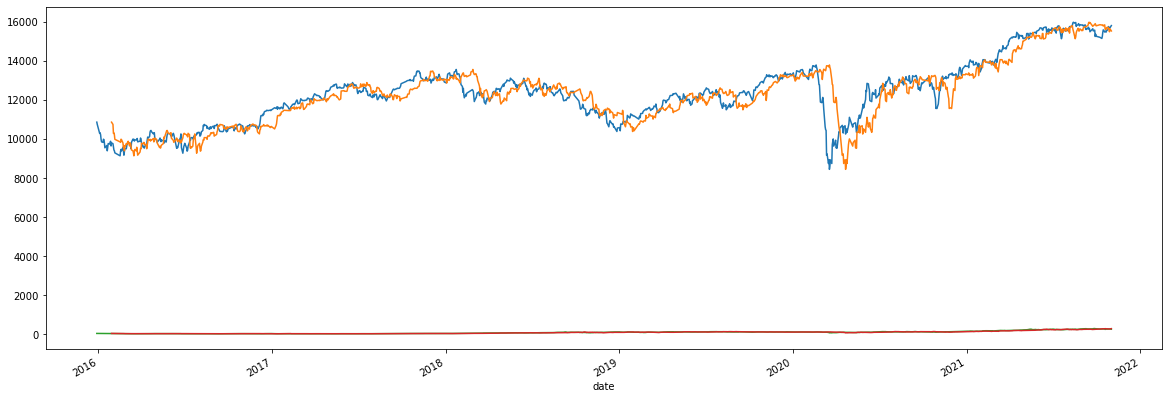

In [91]:
plt.figure(figsize=(20,7))
merge_df['dutch_close'].plot()
merge_df['dutch_close'].shift(20).plot()
merge_df['carbon_credit_price'].plot()
merge_df['carbon_credit_price'].shift(20).plot()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,"10,860.14","3,314.28","6,314.57","5,107.94","4,701.36","3,563.74",177.71,"1,283.25","1,741.53","1,168.50",34.66,37.79,37.87,37.32
2015-12-30,"10,743.01","3,287.98","6,274.05","5,065.85","4,677.14","3,572.88",178.10,"1,283.14","1,738.97","1,173.00",34.57,36.46,36.60,37.05
2016-01-04,"10,283.44","3,164.76","6,093.43","4,903.09","4,522.45","3,296.26",179.60,"1,299.65","1,756.77","1,189.50",32.10,37.22,36.76,36.29
2016-01-05,"10,310.10","3,178.01","6,137.24","4,891.43","4,537.63","3,287.71",179.00,"1,283.71","1,746.66","1,189.50",30.84,36.42,35.97,36.06
2016-01-06,"10,214.02","3,139.32","6,073.38","4,835.77","4,480.47","3,361.84",178.65,"1,287.96","1,756.44","1,200.00",28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,"15,757.06","4,223.97","7,277.62","15,235.72","6,766.51","3,597.64",183.02,"1,356.40","1,613.44","1,167.00",83.23,85.65,84.65,267.61
2021-10-27,"15,705.81","4,220.88","7,253.27","15,235.84","6,753.52","3,562.31",183.56,"1,360.73","1,609.51","1,173.50",81.44,83.87,82.66,268.01
2021-10-28,"15,696.33","4,233.87","7,249.47","15,448.12","6,804.22","3,518.42",183.04,"1,358.48","1,610.84","1,170.50",81.27,83.66,82.81,262.06


<AxesSubplot:>

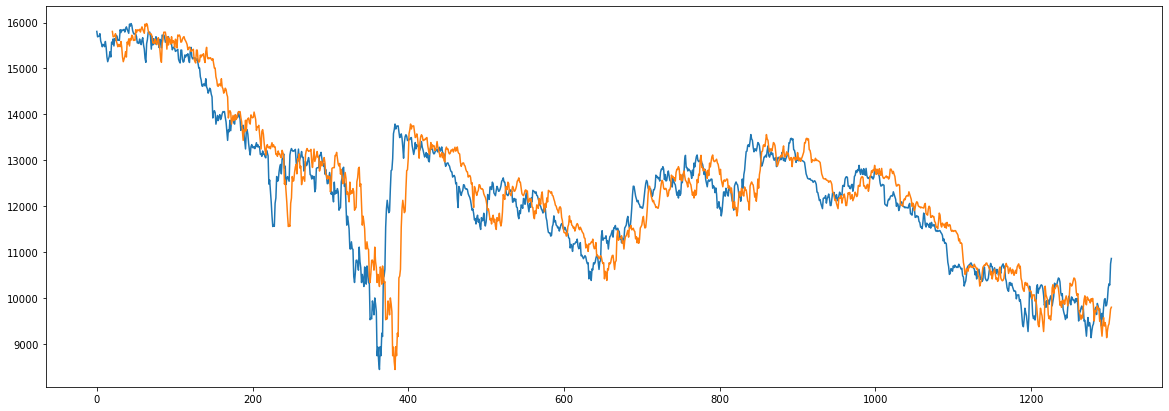

In [31]:
plt.figure(figsize=(20,7))
merge_df['dutch_close'].plot()
merge_df['dutch_close'].shift(20).plot()
# merge_df['euro_close'].plot()
# merge_df['euro_close'].shift(20).plot()
# merge_df['london_close'].plot()
# merge_df['london_close'].shift(20).plot()

In [34]:
merge_df['dutch_close'].rolling(5).mean()

0             NaN
1             NaN
2             NaN
3             NaN
4       15730.852
          ...    
1299     9970.742
1300    10035.676
1301    10127.350
1302    10306.084
1303    10482.142
Name: dutch_close, Length: 1304, dtype: float64

In [13]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1304 non-null   datetime64[ns]
 1   dutch_close          1304 non-null   object        
 2   euro_close           1304 non-null   object        
 3   london_close         1304 non-null   object        
 4   nasdaq_close         1304 non-null   object        
 5   paris_close          1304 non-null   object        
 6   shanghai_close       1304 non-null   object        
 7   cny_exchange         1304 non-null   float64       
 8   eur_exchange         1304 non-null   object        
 9   gbp_exchange         1304 non-null   object        
 10  usd_exchange         1304 non-null   object        
 11  dubai_fuel           1304 non-null   float64       
 12  brent_fuel           1304 non-null   float64       
 13  texas_fuel           1304 non-nul

In [79]:
merge_df['dutch_close'] = pd.to_numeric(merge_df['dutch_close'].apply(lambda x : x.replace(',','')))
merge_df['euro_close'] = pd.to_numeric(merge_df['euro_close'].apply(lambda x : x.replace(',','')))
merge_df['london_close'] = pd.to_numeric(merge_df['london_close'].apply(lambda x : x.replace(',','')))
merge_df['nasdaq_close'] = pd.to_numeric(merge_df['nasdaq_close'].apply(lambda x : x.replace(',','')))
merge_df['paris_close'] = pd.to_numeric(merge_df['paris_close'].apply(lambda x : x.replace(',','')))
merge_df['shanghai_close'] = pd.to_numeric(merge_df['shanghai_close'].apply(lambda x : x.replace(',','')))

merge_df['eur_exchange'] = pd.to_numeric(merge_df['eur_exchange'].apply(lambda x : x.replace(',','')))
merge_df['gbp_exchange'] = pd.to_numeric(merge_df['gbp_exchange'].apply(lambda x : x.replace(',','')))
merge_df['usd_exchange'] = pd.to_numeric(merge_df['usd_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2021-11-01 to 2015-12-29
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dutch_close          1304 non-null   float64
 1   euro_close           1304 non-null   float64
 2   london_close         1304 non-null   float64
 3   nasdaq_close         1304 non-null   float64
 4   paris_close          1304 non-null   float64
 5   shanghai_close       1304 non-null   float64
 6   cny_exchange         1304 non-null   float64
 7   eur_exchange         1304 non-null   float64
 8   gbp_exchange         1304 non-null   float64
 9   usd_exchange         1304 non-null   float64
 10  dubai_fuel           1304 non-null   float64
 11  brent_fuel           1304 non-null   float64
 12  texas_fuel           1304 non-null   float64
 13  carbon_credit_price  1304 non-null   float64
dtypes: float64(14)
memory usage: 152.8 KB


### Regressor

In [25]:
x1 = merge_df.drop(['carbon_credit_price','date'],axis=1)
y1 = merge_df['carbon_credit_price']

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error, r2_score

In [26]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=100)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

(978, 13)

In [29]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 15.041803946996163
r_score : 0.9529656917468654

Ridge
rmse : 15.017883076219428
r_score : 0.9531151694283095

Lasso
rmse : 16.921056365975026
r_score : 0.940479049522844

XGBRegressor
rmse : 5.961406963484271
r_score : 0.9926122455101068

LGBMRegressor
rmse : 6.260046378014654
r_score : 0.9918535196388419

RandomForestRegressor
rmse : 5.465023080592713
r_score : 0.9937913251780894



### classification

In [30]:
merge_df2 = merge_df.copy()
merge_df2.head(5)

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05,254.77
1,2021-10-29,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57,262.68
2,2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06
3,2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
4,2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61


In [31]:
merge_df2['dutch_close'] = (merge_df2['dutch_close'].shift()-merge_df2['dutch_close'])/merge_df2['dutch_close']
merge_df2['euro_close'] = (merge_df2['euro_close'].shift()-merge_df2['euro_close'])/merge_df2['euro_close']
merge_df2['london_close'] = (merge_df2['london_close'].shift()-merge_df2['london_close'])/merge_df2['london_close']
merge_df2['nasdaq_close'] = (merge_df2['nasdaq_close'].shift()-merge_df2['nasdaq_close'])/merge_df2['nasdaq_close']
merge_df2['paris_close'] = (merge_df2['paris_close'].shift()-merge_df2['paris_close'])/merge_df2['paris_close']
merge_df2['shanghai_close'] = (merge_df2['shanghai_close'].shift()-merge_df2['shanghai_close'])/merge_df2['shanghai_close']

merge_df2['cny_exchange'] = (merge_df2['cny_exchange'].shift()-merge_df2['cny_exchange'])/merge_df2['cny_exchange']
merge_df2['eur_exchange'] = (merge_df2['eur_exchange'].shift()-merge_df2['eur_exchange'])/merge_df2['eur_exchange']
merge_df2['gbp_exchange'] = (merge_df2['gbp_exchange'].shift()-merge_df2['gbp_exchange'])/merge_df2['gbp_exchange']
merge_df2['usd_exchange'] = (merge_df2['usd_exchange'].shift()-merge_df2['usd_exchange'])/merge_df2['usd_exchange']

merge_df2['dubai_fuel'] = (merge_df2['dubai_fuel'].shift()-merge_df2['dubai_fuel'])/merge_df2['dubai_fuel']
merge_df2['brent_fuel'] = (merge_df2['brent_fuel'].shift()-merge_df2['brent_fuel'])/merge_df2['brent_fuel']
merge_df2['texas_fuel'] = (merge_df2['texas_fuel'].shift()-merge_df2['texas_fuel'])/merge_df2['texas_fuel']

merge_df2['carbon_credit_price'] = (merge_df2['carbon_credit_price'].shift()-merge_df2['carbon_credit_price'])/merge_df2['carbon_credit_price']
merge_df2['carbon_credit_price'] = merge_df2['carbon_credit_price'].apply(lambda x : 1 if x>0 else 0)

In [32]:
merge_df2 = merge_df2.dropna()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [34]:
x2 = merge_df2.drop(['carbon_credit_price','date'],axis=1)
y2 = merge_df2['carbon_credit_price']

In [35]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,random_state=100)

In [68]:
log = LogisticRegression()
log.fit(x_train2, y_train2)

tree = DecisionTreeClassifier()
tree.fit(x_train2, y_train2)

gnb = GaussianNB()
gnb.fit(x_train2, y_train2)

rfc = RandomForestClassifier()
rfc.fit(x_train2, y_train2)

RandomForestClassifier()

In [37]:
from sklearn.metrics import accuracy_score

log_preds = log.predict(x_test2)
print('LogisticRegression')
print(accuracy_score(y_test2, log_preds))
print()

tree_preds = tree.predict(x_test2)
print('DecisionTreeClassifier')
print(accuracy_score(y_test2,tree_preds))
print()

gnb_preds = log.predict(x_test2)
print('GaussianNB')
print(accuracy_score(y_test2, gnb_preds))
print()

rfc_preds = tree.predict(x_test2)
print('RandomForestClassifier')
print(accuracy_score(y_test2,rfc_preds))
print()

LogisticRegression
0.5797546012269938

DecisionTreeClassifier
0.5276073619631901

GaussianNB
0.5797546012269938

RandomForestClassifier
0.5276073619631901



In [38]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test2, log_preds)
print(class_report)

class_report = classification_report(y_test2, tree_preds)
print(class_report)

class_report = classification_report(y_test2, gnb_preds)
print(class_report)

class_report = classification_report(y_test2, rfc_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       166
           1       0.52      0.53      0.52       160

    accuracy                           0.53       326
   macro avg       0.53      0.53      0.53       326
weighted avg       0.53      0.53      0.53       326

              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

              preci

### gridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y2)

In [117]:
estimator = RandomForestRegressor()

In [118]:
param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

In [119]:
from sklearn.model_selection import KFold

In [120]:
# 평가지표 지정
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [121]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             verbose=2)

In [122]:
print('best_params',grid_search.best_params_)
print('best_score',grid_search.best_score_)

best_params {'max_depth': 9, 'min_samples_split': 0.1, 'n_estimators': 150}
best_score 0.05390909828562551


In [102]:
estimator = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )


In [103]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             verbose=2)

In [104]:
print('best_params',grid_search.best_params_)
print('best_score',grid_search.best_score_)

best_params {'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 100}
best_score 0.6284241531664211


In [111]:
estimator = XGBRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )
param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [112]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
[17:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weigh...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    sub

In [113]:
print('best_params',grid_search.best_params_)
print('best_score',grid_search.best_score_)

best_params {'max_depth': 9, 'min_samples_split': 0.01, 'n_estimators': 100}
best_score -0.14346423108901146


In [114]:
estimator = LGBMRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )
param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [115]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             verbose=2)

In [116]:
print('best_params',grid_search.best_params_)
print('best_score',grid_search.best_score_)

best_params {'max_depth': 6, 'min_samples_split': 0.01, 'n_estimators': 100}
best_score -0.06436396285063625


In [123]:
estimator = LGBMRegressor()

param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )
param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [124]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             verbose=2)

In [125]:
print('best_params',grid_search.best_params_)
print('best_score',grid_search.best_score_)

best_params {'max_depth': 6, 'min_samples_split': 0.01, 'n_estimators': 100}
best_score -0.06436396285063625
